## Notch-Delta-Jagged-Fringe-VEGF model for 1 cell ("mean field" approach)

Equations:

\begin{equation}
\frac{dN}{dt} = N_0 H^{S+}(I) -  N [ (k_{c} D + k_{t} D_{ext})H^S(I, \lambda^F_D) + (k_{c} J + k_{t} J_{ext})H^S(I, \lambda^F_J)] - \gamma N
\end{equation}

\begin{equation}
\frac{dD}{dt} = D_0 H^{S-}(I) H^{S+}(V) - k_c H^S(I, \lambda^F_D) D N  - k_t D N_{ext} - \gamma D
\end{equation}

\begin{equation}
\frac{dJ}{dt} = J_0 H^{S+}(I) - k_c H^S(I, \lambda^F_J) J N  - k_t J N_{ext} - \gamma J 
\end{equation}

\begin{equation}
\frac{dI}{dt} = k_{t} N (D_{ext} H^S(I, \lambda^F_D) + J_{ext} H^S(I, \lambda^F_J)) - \gamma_I I 
\end{equation}

\begin{equation}
\frac{dV_R}{dt} = V_{R0} H^{S-}(I) - k_t V_R V_{ext} - \gamma V_R 
\end{equation}

\begin{equation}
\frac{dV}{dt} = k_t V_R V_{ext} - \gamma_I V 
\end{equation}

In [1]:
import PyDSTool_aux_functions as aux
from PyDSTool import *
from PyDSTool.Toolbox import phaseplane as pp

%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams.update({'font.size': 18}) 

In [2]:
nmodel = 'Notch_Angio'
DSargs      = args(name=nmodel, checklevel=2)
DSargs.pars = {'g'  : 1.0e-1                                                  # degradation of a protein 
              ,'gI' : 5.0e-1                                                  # degradation of NICD 
              ,'kc' : 5.0e-4                                                  # rate of cis interaction
              ,'kt' : 2.5e-5                                                  # rate of trans interaction
              ,'p'  : 2.0e+0, 'pj' : 5.0e+0                                   # hill coeficient
              ,'I0' : 2.0e+2, 'V0' : 2.0e+2                                   # hill factor
              ,'Nt' : 2.0e+3, 'Dt' : 0.4e+3, 'Jt' : 1.0e+3, 'Vt' : 2.0e+3     # external proteins
              ,'N0' : 1.2e+3, 'D0' : 1.0e+3, 'J0' : 0.8e+3, 'R0' : 1.0e+3     # production rate
              ,'ln' : 2.0e+0, 'ld' : 0.0e+0, 'lj' : 2.0e+0                    # lambda of shifted hill function
              ,'lv' : 0.0e+0, 'ldv': 2.0e+0
              ,'pf' : 1.0
              ,'ldf': 3.0,    'ljf': 0.3
              }
DSargs.varspecs = {'N': '''N0*HS(I,I0,p ,ln) - N*( (kc*D + kt*Dt)*HS(I,I0,pf,ldf) 
                                                 + (kc*J + kt*Jt)*HS(I,I0,pf,ljf) ) - g*N'''
                  ,'D': 'D0*HS(I,I0,p ,ld)*HS(V,V0,p,ldv) - D*( kc*N*HS(I,I0,pf,ldf) + kt*Nt ) - g*D'
                  ,'J': 'J0*HS(I,I0,pj,lj)                - J*( kc*N*HS(I,I0,pf,ljf) + kt*Nt ) - g*J'
                  ,'I': 'kt*N*( Dt*HS(I,I0,pf,ldf) + Jt*HS(I,I0,pf,ljf) )  - gI*I'
                  ,'R': 'R0*HS(I,I0,p ,lv) - kt*R*Vt - g*R'
                  ,'V': 'kt*R*Vt - gI*V'
                  }
DSargs.fnspecs  = [aux.functions()]
DSargs.ics      = {'N': 0, 'D': 0, 'J': 0, 'I': 0, 'R': 0, 'V': 0}
DSargs.xdomain  = {'N': [0, 2.0e+4], 'D': [-200, 2.0e+4], 'J': [0, 2.0e+4]
                  ,'I': [0, 1.0e+4], 'R': [0, 2.0e+4], 'V': [0, 2.0e+4]
                  }
DSargs.pdomain  = {'Dt': [0, 5001], 'Jt': [0, 12001], 'Vt': [-200,12001]
                  }
DSargs.tdomain  = [0., 100.]
DSargs.algparams= {'init_step':0.1}
ODE = Vode_ODEsystem(DSargs)

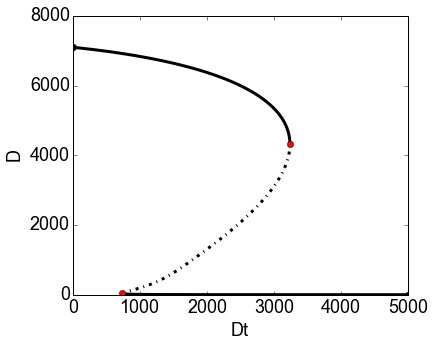

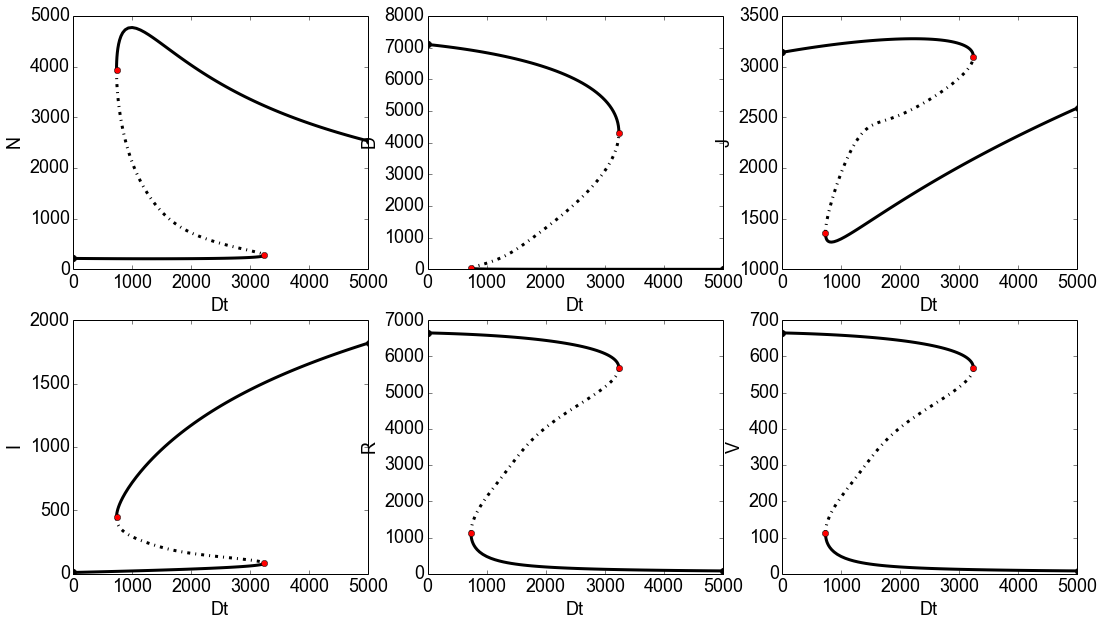

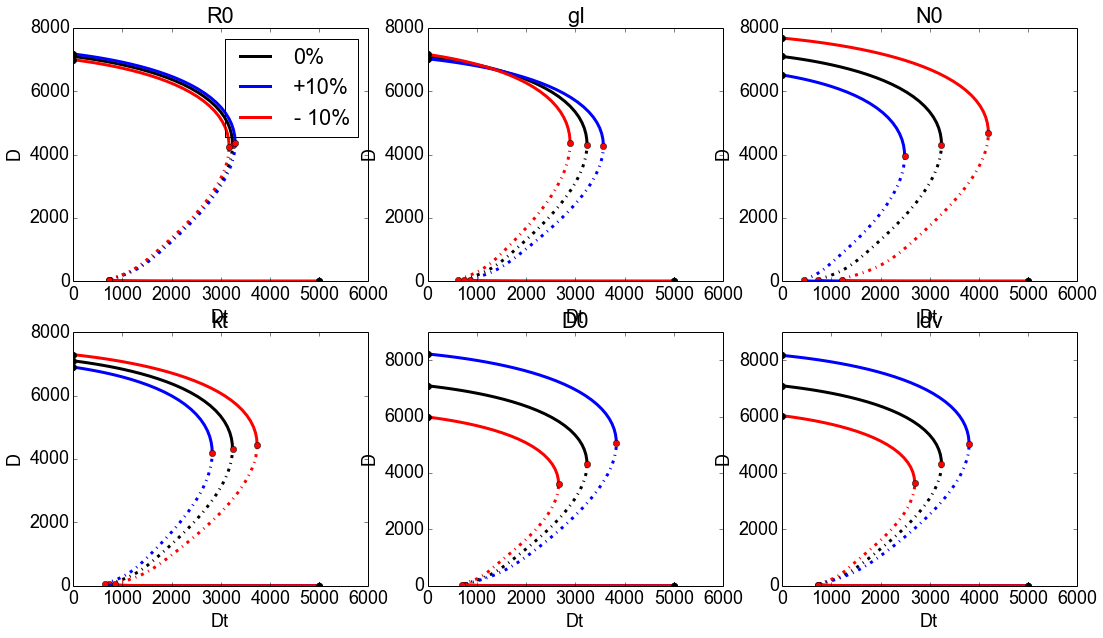

In [3]:
freepar = 'Dt'
ODE = Vode_ODEsystem(DSargs)
# ------------------------------- Fig. 2B ---------------------------------------------
aux.plot_continuation(ODE, freepar, keys=['D'], bif_startpoint=1.0, xlim=[0,5000], 
                      xticks=[0, 1000, 2000, 3000, 4000, 5000], yticks=[0, 2000, 4000, 6000, 8000],
                      maxstep=1e+2, minstep=1e-2, step=5e+1, silence=True, fig_name='./figures/Bif_Dt_Vt2000.pdf')
# ------------------------------- Fig. S3 ---------------------------------------------
aux.plot_continuation(ODE, freepar, keys=['N', 'D', 'J', 'I', 'R', 'V'], bif_startpoint=1.0, ncol=3, nrow=2, 
                      xlim=[0,5000], xticks=[0, 1000, 2000, 3000, 4000, 5000], maxstep=1e+2, minstep=1e-2, 
                      step=5e+1, silence=True, fig_name='./figures/Bif_Dt_Vt2000_All.pdf')
# ------------------------------- Fig. S2 ---------------------------------------------
aux.param_sensitivity_bifurcations(DSargs, freepar, 'D', ['R0','gI','N0','kt','D0','ldv'], 0.1, silence=True,
                                   maxstep=2e+2, minstep=1e-2, step=5e+1, nrow=2, ncol=3, xlim=[0, 5000],
                                   yticks=[0, 2000, 4000, 6000, 8000],
                                   fig_name='./figures/ParamSensit_Bifurcations.pdf')

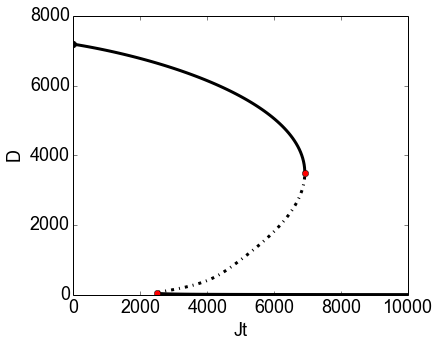

In [4]:
freepar = 'Jt'
ODE = Vode_ODEsystem(DSargs)
# ------------------------------- Fig. S4A ---------------------------------------------
aux.plot_continuation(ODE, freepar, keys=['D'], bif_startpoint=1.0, xlim=[0,10000], maxstep=1e+2, minstep=1e-2,
                      step=5e+1, xticks=[0, 2000, 4000, 6000, 8000, 10000], yticks=[0, 2000, 4000, 6000, 8000],
                      silence=True, fig_name='./figures/Bif_Jt_Vt2000.pdf')

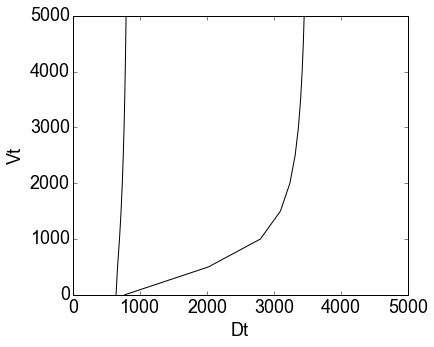

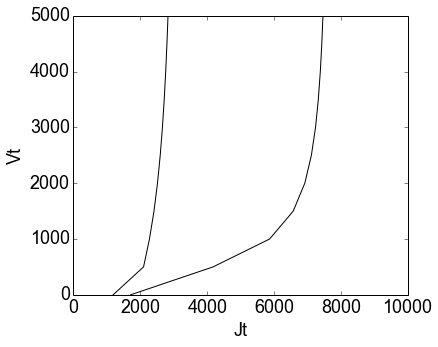

In [5]:
v   = 'Vt'
r_v = range(0,5001,500)
# ------------------------------- Fig. 2C ---------------------------------------------
freepar = 'Dt'
ODE = Vode_ODEsystem(DSargs)
aux.plot_phasediagram(ODE, freepar, v, r_v, bif_startpoint=0.1, xlim=[0,5000], show_continuation=False,
                      yticks=[0, 1000, 2000, 3000, 4000, 5000], xticks=[0, 1000, 2000, 3000, 4000, 5000], 
                      maxstep=1e+2, minstep=1e-2, step=5e+1, LocBifPoints=['LP','B'], 
                      silence=True, fig_name='./figures/PhaseDiagram_DtxVt.pdf')
# ------------------------------- Fig. S4B ---------------------------------------------
freepar = 'Jt'
ODE = Vode_ODEsystem(DSargs)
aux.plot_phasediagram(ODE, freepar,v, r_v, bif_startpoint=0.1, xlim=[0,10000], show_continuation=False, 
                      xticks=[0, 2000, 4000, 6000, 8000, 10000], yticks=[0, 1000, 2000, 3000, 4000, 5000],
                      maxstep=1e+2, minstep=1e-2, step=5e+1, LocBifPoints=['LP','B'], 
                      silence=True, fig_name='./figures/PhaseDiagram_JtxVt.pdf')

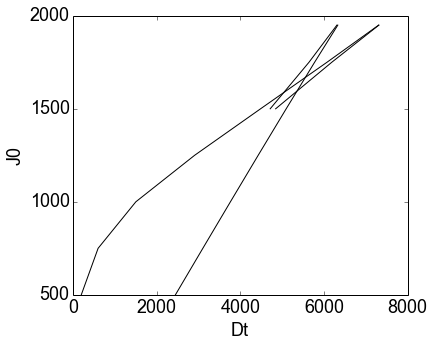

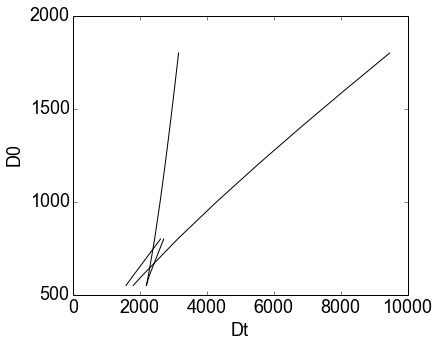

In [6]:
freepar = 'Dt'
DSargs.pdomain['Dt'] = [0, 10001]

# ------------------------------- Fig. 3B ---------------------------------------------
r_v = list(range(500,2000,250)) + [1950]
v = 'J0'
ODE = Vode_ODEsystem(DSargs)
aux.plot_phasediagram(ODE, freepar, v, r_v, bif_startpoint=0.1, silence=True, show_continuation=False, 
                      xlim=[0,8000], ylim=[500, 2000], LocBifPoints=['LP','B'], xticks=[0, 2000, 4000, 6000, 8000], 
                      yticks=[500, 1000, 1500, 2000], fig_name='./figures/PhaseDiagram_DtJ0.pdf')
# ------------------------------- Fig. 3E ---------------------------------------------
r_v = [550] + list(range(600,2000,200))
v   = 'D0'
ODE = Vode_ODEsystem(DSargs)
ODE.set(pars = {'J0': 1200} )
aux.plot_phasediagram(ODE, freepar, v, r_v, bif_startpoint=0.1, silence=True, show_continuation=False, 
                      xlim=[0,10000], ylim=[500, 2000], LocBifPoints=['LP','B'], yticks=[500, 1000, 1500, 2000],
                      xticks=[0, 2000, 4000, 6000, 8000, 10000], fig_name='./figures/PhaseDiagram_DtD0.pdf')

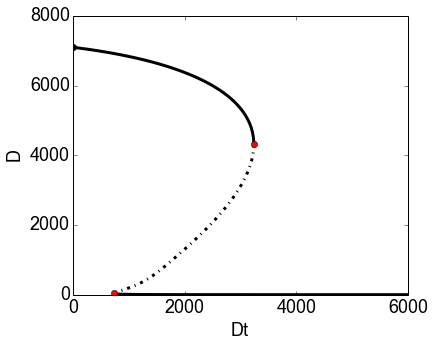

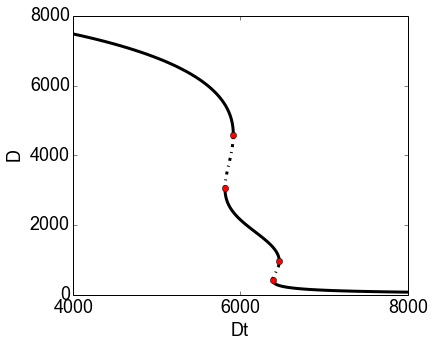

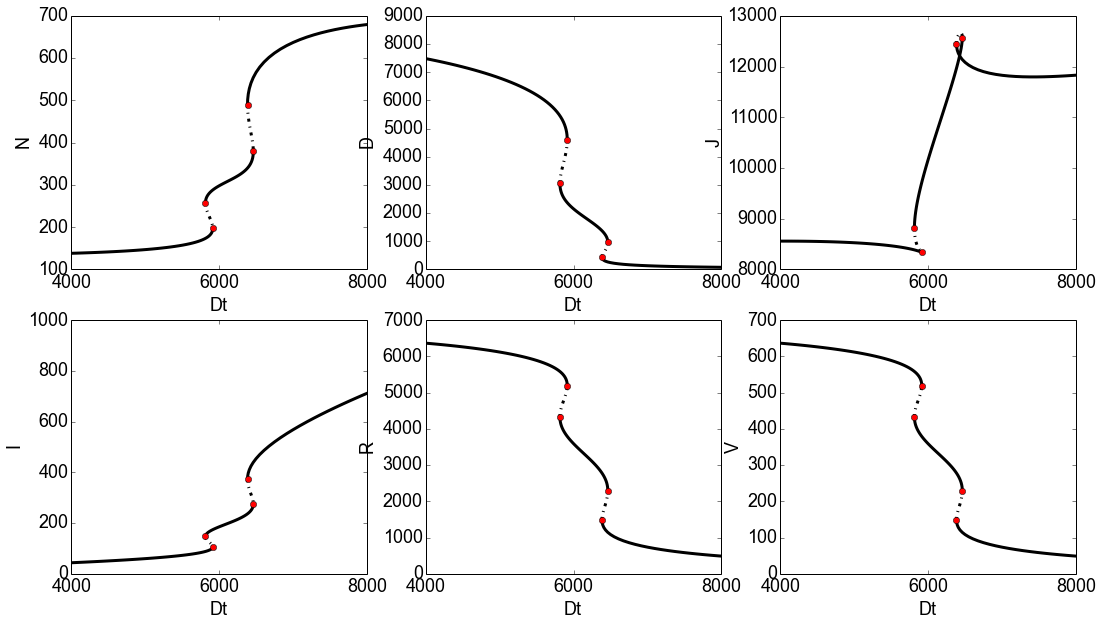

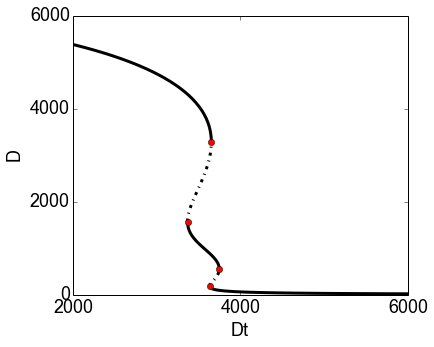

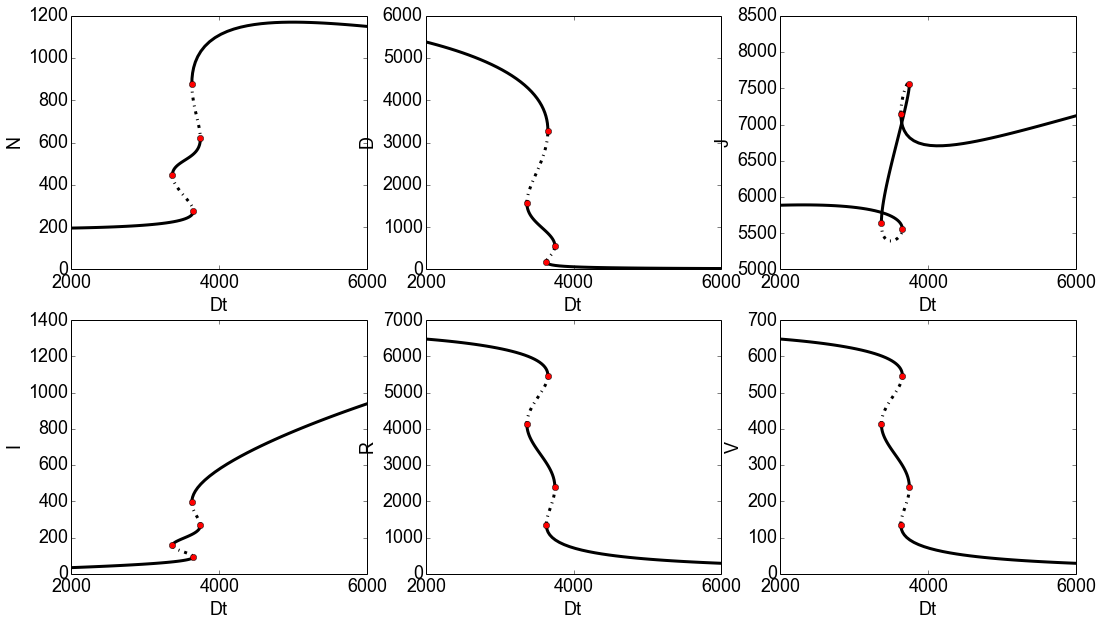

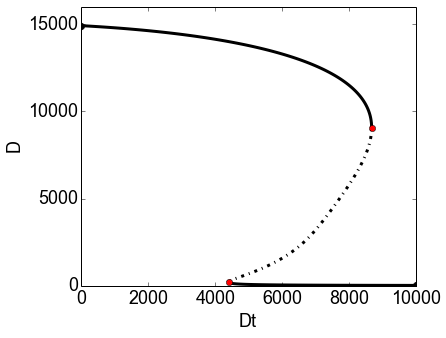

In [7]:
freepar = 'Dt'
ODE = Vode_ODEsystem(DSargs)
# ------------------------------- Fig. 3A ---------------------------------------------
ODE.set(pars = {'J0': 800})
aux.plot_continuation(ODE, freepar, keys=['D'], bif_startpoint=1.0, xlim=[0, 6000], xticks=[0, 2000, 4000, 6000],
                      ylim=[0, 8000], yticks=[0, 2000, 4000, 6000, 8000], silence=True, 
                      fig_name='./figures/Bifurc_Dt_J0_800.pdf')
# ------------------------------- Fig. 3C ---------------------------------------------
ODE.set(pars = {'J0': 1800})
aux.plot_continuation(ODE, freepar, keys=['D'], bif_startpoint=1.0, xlim=[4000, 8000], xticks=[4000, 6000, 8000], 
                      ylim=[0, 8000], yticks=[0, 2000, 4000, 6000, 8000], silence=True, 
                      fig_name='./figures/Bifurc_Dt_J0_1800.pdf')
# ------------------------------- Fig. S5A ---------------------------------------------
aux.plot_continuation(ODE, freepar, keys=['N','D','J','I','R','V'], bif_startpoint=1.0, xlim=[4000, 8000], ncol=3,
                      nrow=2, xticks=[4000, 6000, 8000], 
                      silence=True, fig_name='./figures/Bifurc_Dt_J0_1800_All.pdf')
# ------------------------------- Fig. 3D ---------------------------------------------
ODE.set(pars = {'J0': 1400, 'D0': 800})
aux.plot_continuation(ODE, freepar, keys=['D'], bif_startpoint=1.0, xlim=[2000, 6000],  xticks=[2000, 4000, 6000],
                      ylim=[0, 6000], yticks=[0, 2000, 4000, 6000], silence=True, 
                      fig_name='./figures/Bifurc_Dt_D0_800.pdf')
# ------------------------------- Fig. S5B ---------------------------------------------
aux.plot_continuation(ODE, freepar, keys=['N','D','J','I','R','V'], bif_startpoint=1.0, xlim=[2000, 6000],  ncol=3,
                      nrow=2, xticks=[2000, 4000, 6000], 
                      silence=True, fig_name='./figures/Bifurc_Dt_D0_800_All.pdf')
# ------------------------------- Fig. 3F ---------------------------------------------
ODE.set(pars = {'J0': 1400, 'D0': 1600})
aux.plot_continuation(ODE, freepar, keys=['D'], bif_startpoint=1.0, xlim=[0, 10000], ylim=[0,16000], 
                      yticks=[0, 5000, 10000, 15000], 
                      silence=True, fig_name='./figures/Bifurc_Dt_D0_1600.pdf')

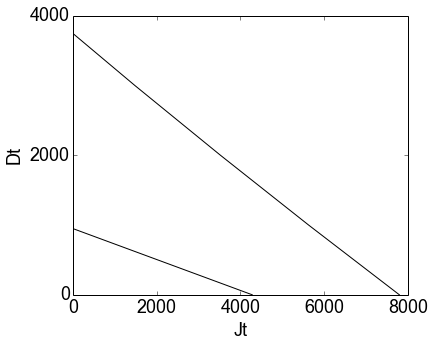

In [8]:
# ------------------------------- Fig. 2D ---------------------------------------------
freepar = 'Jt'
DSargs.pdomain['Jt'] = [-20000, 14001]
v   = 'Dt'
r_v = range(0,4001,1000)
ODE = Vode_ODEsystem(DSargs)
aux.plot_phasediagram(ODE, freepar, v, r_v, bif_startpoint=7000, xlim=[0,8000], ylim=[0,4000], silence=True,
                      xticks=[0, 2000, 4000, 6000, 8000], yticks=[0, 2000, 4000], show_continuation=False, 
                      LocBifPoints=['LP','B'], fig_name='./figures/PhaseDiagram_Jt_Dt.pdf')

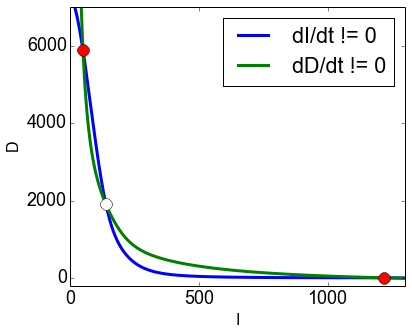

In [9]:
# ------------------------------- Fig. 2A ---------------------------------------------
DSargs.pars['Dt'] = 2000
DSargs.pars['Jt'] = 2000
DSargs.pars['Vt'] = 2000
ODE = Vode_ODEsystem(DSargs)
vlim = {'D': [-200,7000], 'I': [0,1300]}
fp = aux.eliminate_redundants(pp.find_fixedpoints(ODE, n=4, maxsearch=1e+4, eps=1e-10),6)
stab = aux.stability(fp, ODE)
aux.nullclines(['I','D'], DSargs, stab, fp, nfp=0, vlim=vlim, maxpoints=[1000,1000], xticks=[0, 500, 1000],
               yticks=[0, 2000, 4000, 6000], step=5e+1, minstep=1e-0, maxstep=1e+2, silence=True, 
               fig_name='figures/Nullcline_IxD.pdf')

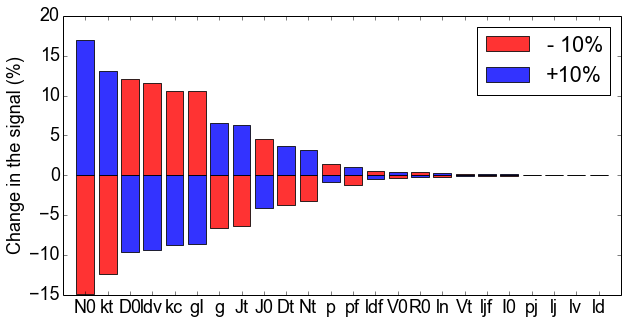

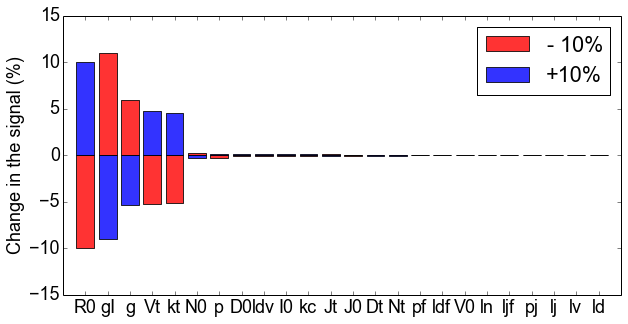

In [10]:
# ------------------------------- Fig. S1 ---------------------------------------------
list_pars = DSargs.pars.keys()
DSargs.pars['J0'] = 1000
DSargs.pars['D0'] = 1200
DSargs.pars['Vt'] = 4000
DSargs.pars['Dt'] = 500
DSargs.pars['Jt'] = 1000
ODE = Vode_ODEsystem(DSargs)
aux.param_sensitivity_bars(list_pars, ODE, DSargs, 'I', fig_name='./figures/ParamSensit_I.pdf')
aux.param_sensitivity_bars(list_pars, ODE, DSargs, 'V', fig_name='./figures/ParamSensit_V.pdf')